<h1 align="center">Transformada de Fourier e sua aplicação em processamento de imagens.</h1>


<p style="text-align: justify;">Você já editou uma imagem em seu computador? Sabe como é feito os filtros de sua foto na rede social? O campo de processamento de imagens tem crescido de maneira ascendente, o avanço de tecnologias na área de captura, processamento e transferência de imagens, tem fomentado esta área que se estende desde imagens de satélite, aplicativos e ferramentas fotográficas, softwares de edição, identificação de sintomas e diagnósticos de doenças no campo da medicina, entre outros. Este artigo tem como objetivo apresentar uma introdução e demonstração da visão computacional de imagens sendo manipuladas com a transformada de Fourier, uma das técnicas usadas para aplicação de filtros, identificação de objetos, remoção de ruídos e outros. 

</p>


A ferramenta utilizada será a linguagem de programação Python e suas bibliotecas Numpy(aplicações matemáticas), OpenCV(manipulação de imagens e matemática) e Matplotlib(criação e exibição de gráficos e imagens), iremos importar as bibliotecas logo abaixo

<h4>Importando bibliotecas</h4>


In [60]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline


<h2>1- Visão computacional de imagens</h2>

<p style="text-align: justify;">Uma imagem é vista pelo computador como uma matriz de números digitais, por isto é necessário representar imagens como arranjos bidimensionais de pontos. Como exemplifica imagem abaixo, onde podemos ver um ponto sendo selecionado por seu índice (M,N) onde M são as linhas e N as colunas, e o índice vai de 0 a m-1 e de 0 a n-1.</p>


<img src="imgx.jpg">

<p style="text-align: justify;">Por exemplo, a imagem abaixo(Exemplo1), aberta pela função "imread" da biblioteca Opencv para Python, entende a imagem como uma matriz bidimensional de (165,166) devido a suas dimensões no momento da criação. Tambem foi extraido sua diagonal principal, observe que é composta por valores de 255 ou proximos a isto, pois como mostra imagem acima o valor 255 é o branco e o 0 é preto, analisando a imagem vemos que sua diagonal principal é realmente repleta por valores em branco.</p>


<h3 align="center">Exemplo1</h3> 
<img src="x5.jpg">

In [61]:
img1 = cv2.imread('x5.jpg',0) #lendo imagem e jogando sua matriz na variavel img

print("Dimensões:",img1.shape) #exibe dimensão da matriz da imagem
print("------------------------------------------------------------------------------")
print(img1.diagonal()) #plota sua diagonal.

Dimensões: (165, 166)
------------------------------------------------------------------------------
[255 253 255 255 255 255 253 255 255 253 255 255 255 255 253 255 255 253
 255 255 255 255 253 255 255 253 255 255 255 255 253 255 255 253 255 255
 255 255 253 255 255 253 255 255 255 255 253 255 255 253 255 255 255 255
 253 255 255 253 255 255 255 255 253 255 255 253 255 255 255 255 253 255
 255 253 255 255 255 255 253 255 255 255 255 255 253 250 250 254 255 253
 255 255 255 255 253 255 255 253 255 255 255 255 253 255 255 253 255 255
 255 255 253 255 255 253 255 255 255 255 253 255 255 253 255 255 255 255
 253 255 255 253 255 255 255 255 253 255 255 253 255 255 255 255 253 255
 255 253 255 255 255 255 253 255 255 253 255 255 255 255 253 255 254 255
 255 255 255]


Plotando seus valores em um grafico de cores temos isto demonstrado, valores mais proximos do amarelo são mais claros, proximos de ou 255.

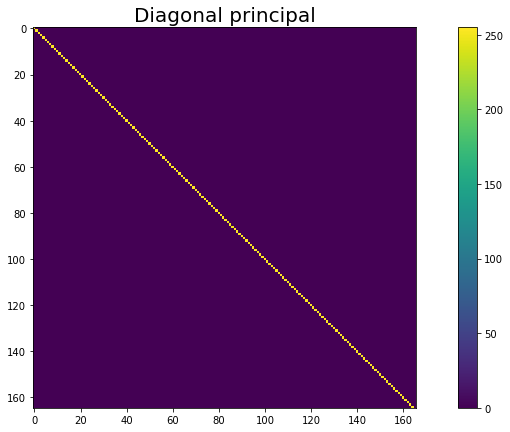

In [62]:
zeros = np.zeros((165,166),int) #cria uma matriz de zeros para receber a diagonal e
#possibilitar plotagem do colorbar
diag=img1.diagonal()  #recebe a diagonal  
np.fill_diagonal(zeros,diag) #preenche a matriz de zeros com a diagonal

plt.figure(figsize=(15,7)) #definindo tamanho de imagem a ser plotada 
plt.imshow(zeros, interpolation='nearest') #define o que plotar
plt.title("Diagonal principal",size=20) #define o titulo da plotagem
plt.colorbar() #define o tipo do grafico a se plotar
plt.show() #agrupa tudo e plota a imagem 


Ja nesta segunda imagem(Exemplo2), percebemos que suas retas para formar um X não são nem um pouco precisas, por este motivo observa-se variancia nos dados da diagonal principal, que é plotada com "falhas" no grafico de cores.

<h3 align="center">Exemplo2</h3> 
<img src="x2.jpg">


In [63]:
img2 = cv2.imread('x2.jpg',0) #lendo imagem e jogando sua matriz na variavel img

print("Dimensões:",img2.shape) #exibe dimensão da matriz da imagem
print("------------------------------------------------------------------------------")
print(img2.diagonal()) #plota sua diagonal.

Dimensões: (165, 166)
------------------------------------------------------------------------------
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3   0   0   0   0   0 255 254 255 250 255 255 255   0
   4   1   2   0   0   0   3   4   0   0   0   0   0   0   0   1 255 255
 255 253 255 254 255 255 255 255 255 253 255 255 255 255 251 255 255 254
 252 254   1 254 253 255 255 253 251 255 252 255 253 255   1   1   0   3
   0   0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]


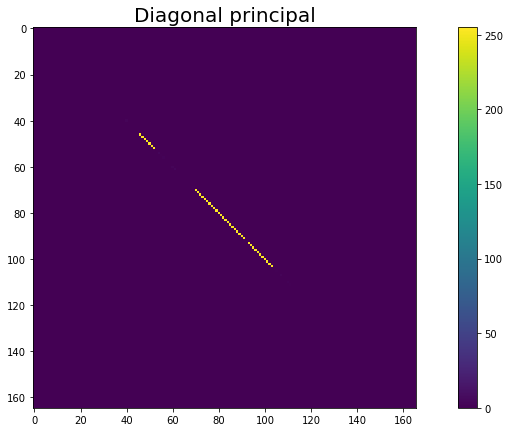

In [64]:
img2 = cv2.imread('x2.jpg',0) #lendo imagem e jogando sua matriz na variavel img


zeros = np.zeros((165,166),int)
diag=img2.diagonal()
np.fill_diagonal(zeros,diag)

plt.figure(figsize=(15,7)) #definindo tamanho de imagem a ser plotada 
plt.imshow(zeros, interpolation='nearest')
plt.title("Diagonal principal",size=20)
plt.colorbar()
plt.show()




<h2>2 - Aplicando a Transformada de Fourier</h2>

<p style="text-align: justify;">A transformada de Fourier possui diversas aplicações em processamento de imagens, como remoção de ruidos, analise de frequencias, identificação de objetos e outros. Abaixo um exemplo da aplicação de uma DFT(Discrete Fourier Transform) na matriz da imagem Exemplo2, observe que sua dimensão continua a mesma porem seus valores assumem alem de tipos reais, também imaginarios, permitindo o trabalho no dominio da frequencia.</p>

In [65]:
img = cv2.imread('x2.jpg',0)

f = np.fft.fft2(img) #aplicando a FFT na imagem
print("Dimensões:",f.shape) #mostra as dimensões da matriz
diag1=f.diagonal() #designa a diagonal a variavel "diag1"
print("------------------------------------------------------------------------------")
print("20 primeiros valores Diagonal")
print(diag1[:20]) #imprime somente os 20 primeiros da  sua diagonal 

Dimensões: (165, 166)
------------------------------------------------------------------------------
20 primeiros valores Diagonal
[ 109677.00000000    +0.j           42108.64714966+30377.89350654j
    8910.36223816+40021.52369394j  -16077.44350399+39186.40637985j
  -24605.03544807+11204.3941274j   -23707.49217735  +467.77619981j
   -5362.12770243 -7498.37291029j   -5955.87486597  -468.68367577j
   -6794.65309027 +5120.88782431j  -18340.47118619 -4520.40875614j
  -18531.40910233-11729.58645121j   -6108.17532041-28886.82666984j
   11443.48317428-26102.08146738j   28011.68226331-13684.26465301j
   28126.65060037 +7242.2401716j    14666.22695001+18183.77135991j
    -282.70020760+20634.33450289j  -10070.74681278 +9818.70440585j
   -9352.31228465 +1789.35300412j    -563.45169555 -3310.05439004j]


<h2>3- Espectros</h2>


<p style="text-align: justify;">Podemos tambem observar a aplicação de Fourier para obtenção do espectro de magnitude de uma imagem, que é a imagem demonstrada no campo da frequencia. O código abaixo aplica a transformada e agrupa com a função "fshift" as frequencias proximas do branco no centro da imagem, desta forma podemos observar melhor a concentração de altas e baixas frequencias, facilitando também a aplicação de filtros.</p>


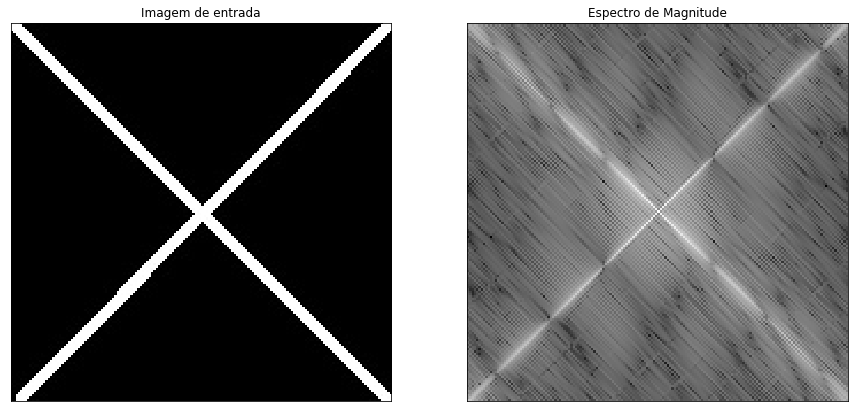

In [66]:
plt.figure(figsize=(15,7)) #definindo tamanho de imagem a ser plotada 

#com numpy
img = cv2.imread('x5.jpg',0) #importando e lendo a imagem
f = np.fft.fft2(img) #aplicando a FFT na imagem

fshift = np.fft.fftshift(f) #joga as frequencias 255 no centro da matriz para observar as maiores frequencias(pixel branco)
                             #ao centro e nao espalhadas
magnitude_spectrum = 20*np.log(np.abs(fshift)) #aplica o espectro de magnitude 

plt.subplot(121),plt.imshow(img, cmap = 'gray') #plota imagem de entrada
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([]) #define o titulo e retira os eixos
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray') #plota espectro de magnitude
plt.title('Espectro de Magnitude'), plt.xticks([]), plt.yticks([]) #define o titulo e retira os eixos
plt.show() #mostre a imagem

Podemos tambem obter o espectro de fase, que em conjunto com o de magnitude e uma posterior aplicação da transformada de Fourier inversa, obtemos a imagem original novamente no dominio do tempo.

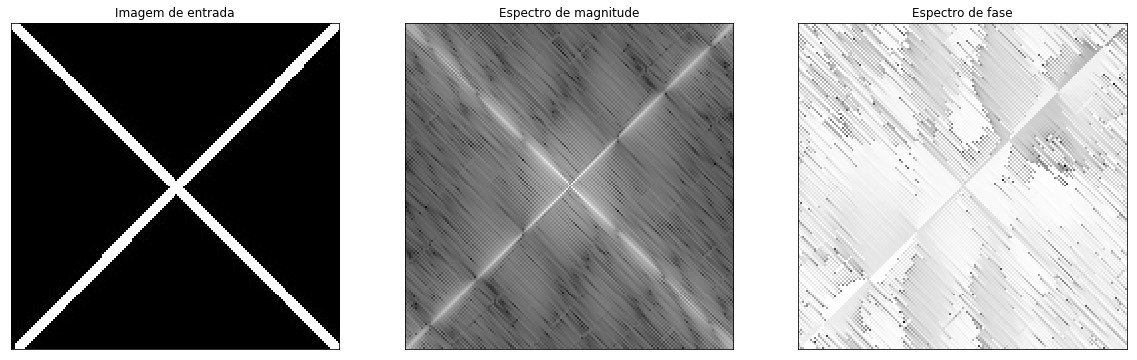

In [67]:
#utilizando opencv
plt.figure(figsize=(20,10))#tamnho a ser plotado

img = cv2.imread('x5.jpg',0)# le imagem

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)#aplica a dft agora com opencv
dft_shift = np.fft.fftshift(dft) #aplica o shift(inversao de frequencias)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) #espectro de magnitude
phase_spectrum = 20*np.log(cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1]))#espectro de fase

#plotagem das imagens.
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro de magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Espectro de fase'), plt.xticks([]), plt.yticks([])
plt.show()

Segue tambem outro exemplo de espectros, por exemplo de 1 pixel.

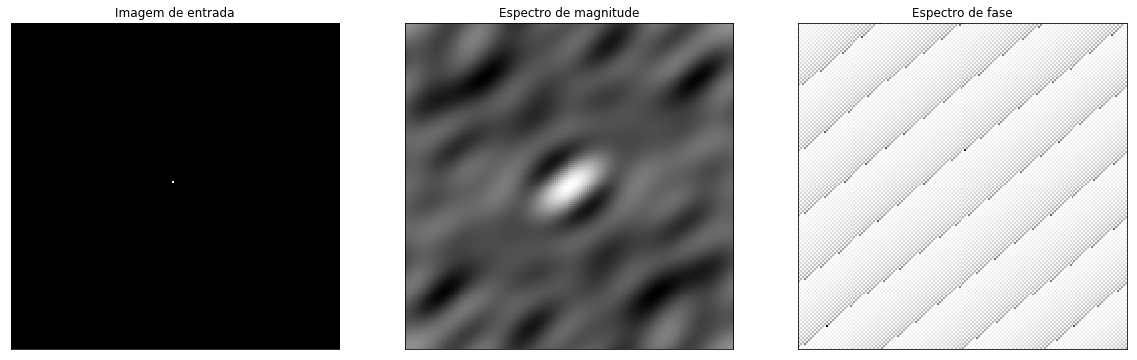

In [68]:


plt.figure(figsize=(20,10))

img4 = cv2.imread('1px.jpg',0)

dft4 = cv2.dft(np.float32(img4),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift4 = np.fft.fftshift(dft4)

magnitude_spectrum4 = 20*np.log(cv2.magnitude(dft_shift4[:,:,0],dft_shift4[:,:,1]))
phase_spectrum4 = 20*np.log(cv2.phase(dft_shift4[:,:,0],dft_shift4[:,:,1]))

plt.subplot(131),plt.imshow(img4, cmap = 'gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum4, cmap = 'gray')
plt.title('Espectro de magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum4, cmap = 'gray')
plt.title('Espectro de fase'), plt.xticks([]), plt.yticks([])
plt.show()

<h2>4-Aplicando filtragem passa baixa</h2>



Uma das utilizações da DFT é aplicar filtros na imagem, no caso abaixo vimos a passa baixa(LPF) sendo utilizada, onde aplicamos uma mascara a imagem e retiramos as frequencias altas, que geralmente são os contornos da figura e se localizam no centro do espectro de magnitude, deixando apenas as frequencias baixas, que deixa ela borrada.

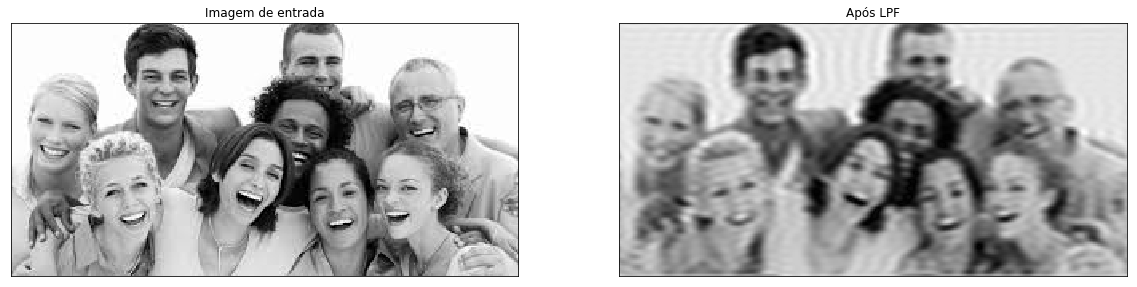

In [69]:
plt.figure(figsize=(20,10)) #define tamanho plotagem
img = cv2.imread('teste2.jpg',0) #le imagem
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)#aplica dft
dft_shift = np.fft.fftshift(dft) #aplica shift, centralizando frequencias


rows, cols = img.shape #coleta qtd linhas e colunas
crow,ccol = rows/2 , cols/2 #divide as quantidades por 2


#cria um quadrao que serve como mascara no centro do espectro de magnitude
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 1

#aplica-se a mascara e se altera o valor do restante dos valores,
#mantem em zero, assim retirando as frequencias altas

#depois aplica-se a transformada inversa e retorna a imagem apenas com as frequencias baixas.
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

#plotando ambas imagens
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Após LPF'), plt.xticks([]), plt.yticks([])
plt.show()


<h2>5-Aplicando filtragem passa alta</h2>

<p style="text-align: justify;">O contrario da filtragem acima, a filtragem passa alta(HPF) separa somente as altas frequencias, o que ressalta o contorno da imagem, geralmente detalhes na imagem geralm altas frequencias, que são por exemplo, borda, transições abruptas de nivel de cinza e outros.Esta aplicação auxilia na identificação de objetos por exemplo, onde podemos agrupar toda alta frequencia no centro de um espectro de magnitude e posteriormente aplicar um filtro, onde zeramos o restante da matriz e deixamos apenas o contorno, assim como fazemos no exemplo abaixo.</p>

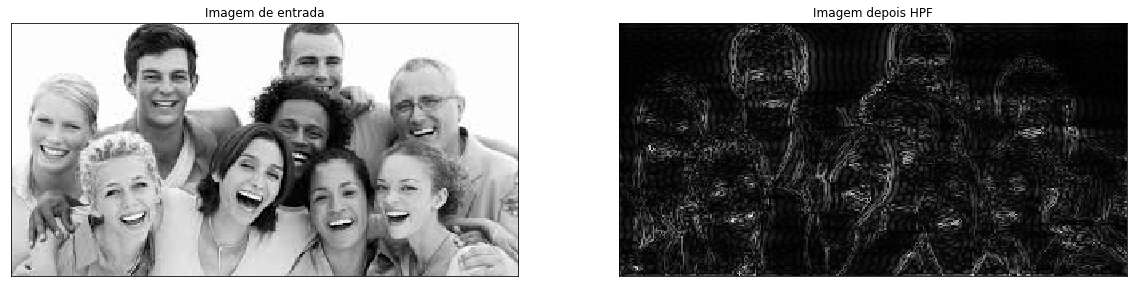

In [70]:
plt.figure(figsize=(20,10))#define tamanho da imagem

img = cv2.imread('teste2.jpg',0) #carrega imagem
f = np.fft.fft2(img) #aplica transofmrada

fshift = np.fft.fftshift(f) #inverte-se frequencias altas pro centro
magnitude_spectrum = 20*np.log(np.abs(fshift))



rows, cols = img.shape#qtde de linhas e colunas
crow,ccol = rows/2 , cols/2 #divide linhas e colunas
fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0
f_ishift = np.fft.ifftshift(fshift) #inverte centralização
img_back = np.fft.ifft2(f_ishift) #aplica transformada inversa
img_back = np.abs(img_back) #deixa apenas valores absolutos

#plota imagens
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Imagem depois HPF'), plt.xticks([]), plt.yticks([])

plt.show()


<h2>6-Conclusão</h2>
<p style="text-align: justify;">Verificamos como uma imagem se comporta na visão computacional, no caso, através de matrizes bidimensionais que possuem valores de 0(preto) a 255(branco), então verificamos a utilização da transformada de Fourier, importante ferramenta no trabalho com imagens, com ela vimos que é possivel agrupar e trabalhar com determinadas frequencias, removendo as indesejadas e escolhendo determinados objetos se baseando em sua escala de cinza, para exemplificar aplicamos o filtro passa baixa, onde as bordas são retiradas pois representam alta frequencia ou mudança abrupta de tons de cinza e posteriormente aplicamos a filtragem passa alta, demonstrando a retirada de baixas frequencias mantendo apenas das bordas da imagem, que ressalta o contorno de pessoas ou objetos presentes na figura. Todas manipulações realizadas na linguagem Python e suas bibliotecas OpenCV,Numpy e Matplotlib, excelentes para trabalhos cientificos e de rapido processamento.</p>


<h3>Fontes:</h3> 
    
    http://www.inf.pucrs.br/~pinho/CG/Aulas/Img/IMG.htm
    
    http://web.archive.org/web/20130513181427id_/http://sharp.bu.edu/~slehar/fourier/fourier.html#filtering
    
    https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
    
    http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT_2.php
    
    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2014.1/Rita-Tutorial-PDI.pdf
    
    http://www2.ic.uff.br/~aconci/filtragemdominiofrequencia.pdf
    
    https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
    